In [4]:
#Github Link
https://github.com/AndrewHord555/ECGR-4105-HW0

SyntaxError: invalid syntax (<ipython-input-4-ab767d6725f6>, line 2)

In [19]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

In [20]:
df = pd.read_csv('C:/Users/andre/Desktop/ECGR HW/ECGR 4105/D3.csv')
df.head()# To get first n rows from the dataset default value of n is 5
M=len(df)

In [21]:
A = df.values[:, 0] #read collumn 1
B = df.values[:, 1]
C = df.values[:, 2]
Y = df.values[:, 3] #read collumn 4
m = len(Y)
print('X='   ,A[:99])
print('K='  ,C[:99])
print('Z=' ,C[:99])
print('Y='  ,Y[:99])
print('m=' ,m)

X= [0.         0.04040404 0.08080808 0.12121212 0.16161616 0.2020202
 0.24242424 0.28282828 0.32323232 0.36363636 0.4040404  0.44444444
 0.48484848 0.52525252 0.56565657 0.60606061 0.64646465 0.68686869
 0.72727273 0.76767677 0.80808081 0.84848485 0.88888889 0.92929293
 0.96969697 1.01010101 1.05050505 1.09090909 1.13131313 1.17171717
 1.21212121 1.25252525 1.29292929 1.33333333 1.37373737 1.41414141
 1.45454546 1.49494949 1.53535354 1.57575758 1.61616162 1.65656566
 1.6969697  1.73737374 1.77777778 1.81818182 1.85858586 1.8989899
 1.93939394 1.97979798 2.02020202 2.06060606 2.1010101  2.14141414
 2.18181818 2.22222222 2.26262626 2.3030303  2.34343434 2.38383838
 2.42424242 2.46464646 2.5050505  2.54545455 2.58585859 2.62626263
 2.66666667 2.70707071 2.74747475 2.78787879 2.82828283 2.86868687
 2.90909091 2.94949495 2.98989899 3.03030303 3.07070707 3.11111111
 3.15151515 3.19191919 3.23232323 3.27272727 3.31313131 3.35353535
 3.39393939 3.43434343 3.47474748 3.51515151 3.55555556 3.595

Text(0, 0.5, 'Dependant Variable ')

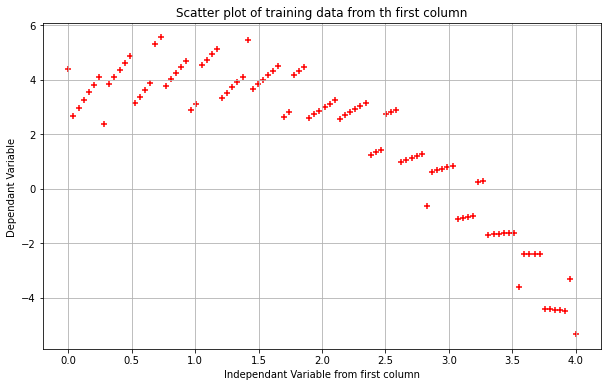

In [22]:
plt.scatter(A,Y,color='red',marker='+')
plt.grid()
plt.title('Scatter plot of training data from th first column')
plt.rcParams["figure.figsize"]=(10,6)
plt.xlabel('Independant Variable from first column')
plt.ylabel('Dependant Variable ')

Text(0, 0.5, 'Dependant Variable')

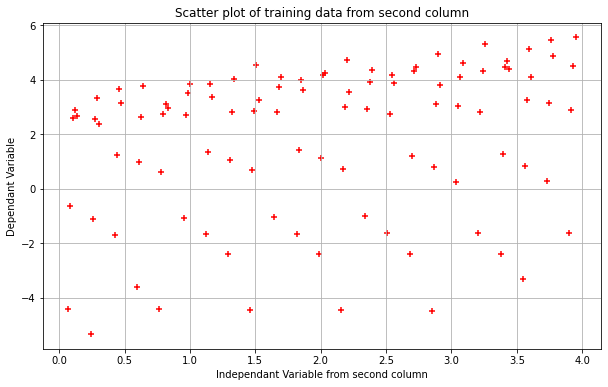

In [23]:
plt.scatter(B,Y,color='red',marker='+')
plt.grid()
plt.title('Scatter plot of training data from second column')
plt.rcParams["figure.figsize"]=(10,6)
plt.xlabel('Independant Variable from second column')
plt.ylabel('Dependant Variable')

Text(0, 0.5, 'Dependant Variable')

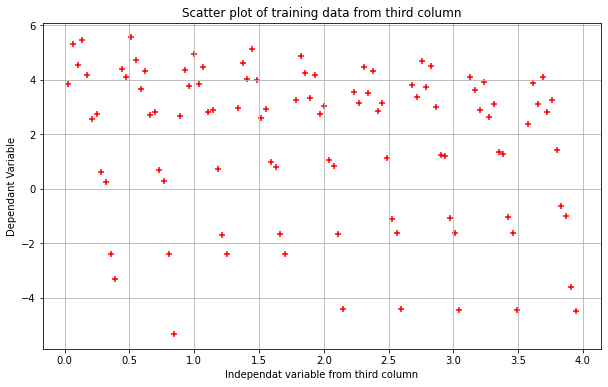

In [24]:
plt.scatter(C,Y,color='red',marker='+')
plt.grid()
plt.title('Scatter plot of training data from third column')
plt.rcParams["figure.figsize"]=(10,6)
plt.xlabel('Independat variable from third column')
plt.ylabel('Dependant Variable')

In [34]:
p = np.ones((m,1))
p[:5]

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.]])

In [35]:
X1 = A.reshape(m,1)
X2= B.reshape(m,1)
X3 = C.reshape(m,1)



In [36]:
#Plot Linear regression and Gradient Decent for first variable
X=np.hstack((p,X1))


In [37]:
theta=np.zeros(2)
theta         

array([0., 0.])

In [38]:
def compute_cost(X,Y,theta):
    predictions = X.dot(theta)
    errors = np.subtract(predictions,Y)
    sqrErrors=np.square(errors)
    J = 1/(2*m)*np.sum(sqrErrors)
    return J

In [39]:
cost=compute_cost(X,Y,theta)
print('The cost for given values of theta_0 and theta_1 =',cost)   

The cost for given values of theta_0 and theta_1 = 5.524438459196242


In [40]:
def gradient_descent(X, Y, theta, alpha, iterations): #Gradient decent for first column
    cost_history=np.zeros(iterations)
    for i in range(iterations):
        prediction = X.dot(theta)
        errors = np.subtract(prediction,Y)
        sum_delta = (alpha/m)*X.transpose().dot(errors);
        theta=theta-sum_delta;
        cost_history[i]=compute_cost(X,Y,theta)
    
    return theta,cost_history

In [41]:
theta = [0.,0.]
iterations = 1500;
alpha = 0.01;   

In [42]:
theta, cost_history = gradient_descent(X,Y,theta,alpha,iterations)
print('Final value of theta =',theta)
print('cost_history =',cost_history) 

Final value of theta = [ 5.71850653 -1.9568206 ]
cost_history = [5.48226715 5.44290965 5.40604087 ... 0.99063932 0.99061433 0.99058944]


Text(0.5, 1.0, 'Linear regression from first variable')

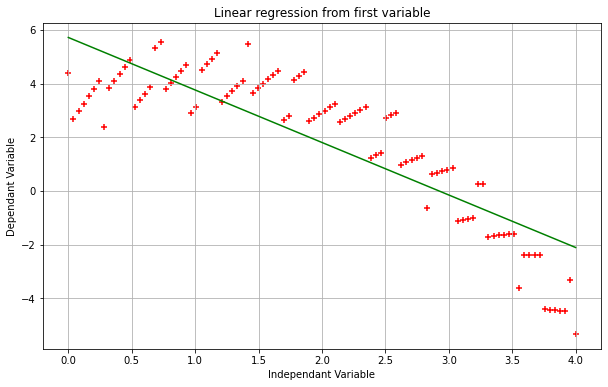

In [43]:
plt.scatter(X[:,1],Y,color='red',marker='+',label='Training Data')
plt.plot(X[:,1],X.dot(theta),color='green',label='Linear Regression')
plt.grid()
plt.rcParams["figure.figsize"]=(10,6)
plt.xlabel('Independant Variable')
plt.ylabel('Dependant Variable')
plt.title('Linear regression from first variable')

Text(0.5, 1.0, 'Convergence of gradient descent of first variable')

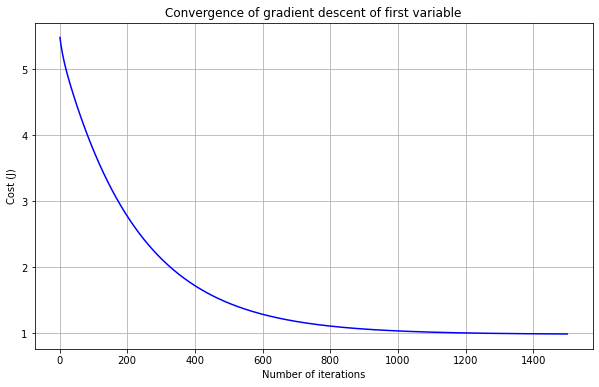

In [44]:
#gradient descent
plt.plot(range(1,iterations+1),cost_history,color='blue')
plt.rcParams["figure.figsize"]=(10,6)
plt.grid()
plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Convergence of gradient descent of first variable')

In [45]:
#Linear regression and Gradient decent from second variable
X=np.hstack((p,X2))


In [46]:
theta=np.zeros(2)
theta   

array([0., 0.])

In [47]:
def compute_cost(X,Y,theta):
    predictions = X.dot(theta)
    errors = np.subtract(predictions,Y)
    sqrErrors=np.square(errors)
    J = 1/(2*m)*np.sum(sqrErrors)
    return J

In [48]:
cost=compute_cost(X,Y,theta)
print('The cost for given values of theta_0 and theta_1 =',cost) 

The cost for given values of theta_0 and theta_1 = 5.524438459196242


In [49]:
def gradient_descent(X, Y, theta, alpha, iterations):
    cost_history=np.zeros(iterations)
    for i in range(iterations):
        prediction = X.dot(theta)
        errors = np.subtract(prediction,Y)
        sum_delta = (alpha/m)*X.transpose().dot(errors);
        theta=theta-sum_delta;
        cost_history[i]=compute_cost(X,Y,theta)
    
    return theta,cost_history

In [50]:
theta = [0.,0.]
iterations = 1500;
alpha = 0.01;   

In [51]:
theta, cost_history = gradient_descent(X,Y,theta,alpha,iterations)
print('Final value of theta =',theta)
print('cost_history =',cost_history) 

Final value of theta = [0.71988473 0.56390334]
cost_history = [5.29831663 5.09909109 4.92356115 ... 3.5993997  3.59939955 3.5993994 ]


Text(0.5, 1.0, 'Linear Regression for the second variable')

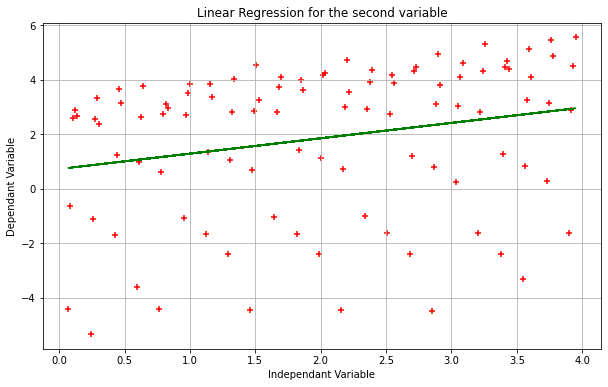

In [52]:
plt.scatter(X[:,1],Y,color='red',marker='+',label='Training Data')
plt.plot(X[:,1],X.dot(theta),color='green',label='Linear Regression')
plt.grid()
plt.rcParams["figure.figsize"]=(10,6)
plt.xlabel('Independant Variable')
plt.ylabel('Dependant Variable')
plt.title('Linear Regression for the second variable')

Text(0.5, 1.0, 'Gradient Decent for the second Variable')

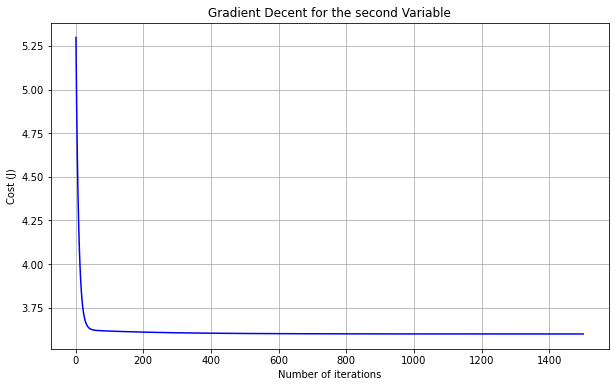

In [53]:
#gradient descent
plt.plot(range(1,iterations+1),cost_history,color='blue')
plt.rcParams["figure.figsize"]=(10,6)
plt.grid()
plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Gradient Decent for the second Variable')

In [54]:
#Linear Regression and Gradient Decent for the third variable.
X=np.hstack((p,X3))

In [55]:
theta=np.zeros(2)
theta   

array([0., 0.])

In [56]:
def compute_cost(X,Y,theta):
    predictions = X.dot(theta)
    errors = np.subtract(predictions,Y)
    sqrErrors=np.square(errors)
    J = 1/(2*m)*np.sum(sqrErrors)
    return J

In [57]:
cost=compute_cost(X,Y,theta)
print('The cost for given values of theta_0 and theta_1 =',cost) 

The cost for given values of theta_0 and theta_1 = 5.524438459196242


In [58]:
def gradient_descent(X, Y, theta, alpha, iterations):
    cost_history=np.zeros(iterations)
    for i in range(iterations):
        prediction = X.dot(theta)
        errors = np.subtract(prediction,Y)
        sum_delta = (alpha/m)*X.transpose().dot(errors);
        theta=theta-sum_delta;
        cost_history[i]=compute_cost(X,Y,theta)
    
    return theta,cost_history

In [59]:
theta = [0.,0.]
iterations = 1500;
alpha = 0.01; 

In [60]:
theta, cost_history = gradient_descent(X,Y,theta,alpha,iterations)
print('Final value of theta =',theta)
print('cost_history =',cost_history)

Final value of theta = [ 2.78048129 -0.48451631]
cost_history = [5.40768785 5.30397076 5.21178297 ... 3.63053597 3.6305311  3.63052625]


Text(0.5, 1.0, 'Linear regression of the third variable')

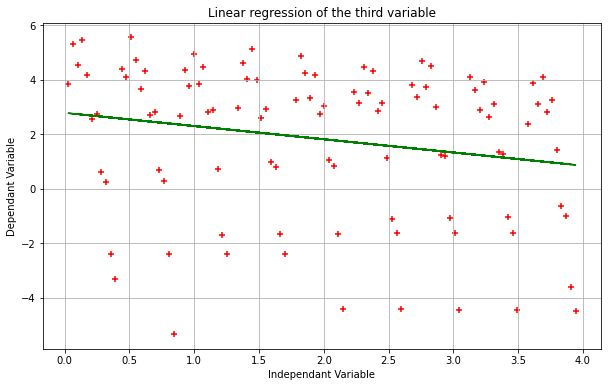

In [61]:
plt.scatter(X[:,1],Y,color='red',marker='+',label='Training Data')
plt.plot(X[:,1],X.dot(theta),color='green',label='Linear Regression')
plt.grid()
plt.rcParams["figure.figsize"]=(10,6)
plt.xlabel('Independant Variable')
plt.ylabel('Dependant Variable')
plt.title('Linear regression of the third variable')

Text(0.5, 1.0, 'Gradient decent for the third variable')

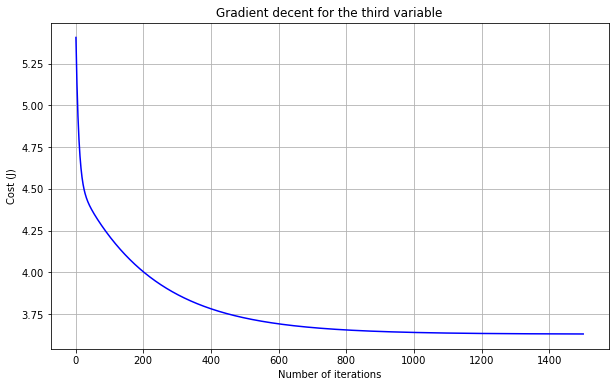

In [62]:
#gradient descent
plt.plot(range(1,iterations+1),cost_history,color='blue')
plt.rcParams["figure.figsize"]=(10,6)
plt.grid()
plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Gradient decent for the third variable')

In [63]:
#Problem 2 Plot all on the same plot

In [64]:
#Linear regression and gradient decent of all three variables
X= np.hstack((p,X1,X2,X3))

In [65]:
theta=np.zeros(4)
theta   

array([0., 0., 0., 0.])

In [66]:
def compute_cost(X,Y,theta):
    predictions = X.dot(theta)
    errors = np.subtract(predictions,Y)
    sqrErrors=np.square(errors)
    J = 1/(2*m)*np.sum(sqrErrors)
    return J

In [67]:
cost=compute_cost(X,Y,theta)
print('The cost for given values of theta_0 and theta_1 =',cost) 

The cost for given values of theta_0 and theta_1 = 5.524438459196242


In [68]:
def gradient_descent(X, Y, theta, alpha, iterations):
    cost_history=np.zeros(iterations)
    for i in range(iterations):
        prediction = X.dot(theta)
        errors = np.subtract(prediction,Y)
        sum_delta = (alpha/m)*X.transpose().dot(errors);
        theta=theta-sum_delta;
        cost_history[i]=compute_cost(X,Y,theta)
    
    return theta,cost_history

In [69]:
theta = [0., 0., 0.,0.,]
iterations = 1500;
alpha = 0.01; 

In [70]:
theta, cost_history = gradient_descent(X,Y,theta,alpha,iterations)
print('Final value of theta =',theta)
print('cost_history =',cost_history)

Final value of theta = [ 4.15118728 -1.8394291   0.72473856 -0.09513266]
cost_history = [5.21542243 4.97171977 4.7765543  ... 0.81079843 0.81065429 0.81051044]


Text(0.5, 1.0, 'Gradient Decent of all three variables')

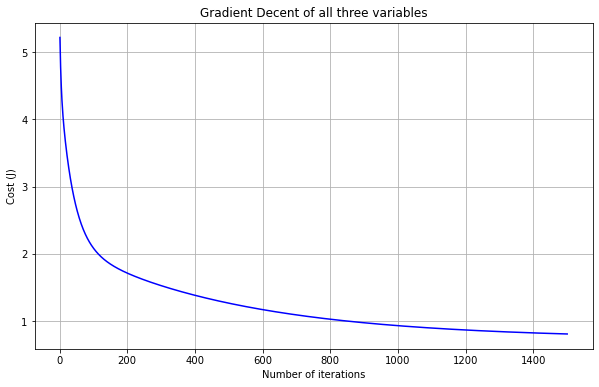

In [71]:
#gradient descent
plt.plot(range(1,iterations+1),cost_history,color='blue')
plt.rcParams["figure.figsize"]=(10,6)
plt.grid()
plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Gradient Decent of all three variables')

In [77]:
Y1 = theta.dot(np.array([1,1,1,1]))
Y1

2.9413640816645303

In [78]:
Y2 = theta.dot(np.array([1,2,0,4]))
Y2

0.09179843075891597

In [80]:
Y3 = theta.dot(np.array([1,3,2,1]))
Y3

-0.012755552822328209

In [81]:
#Questions and Answers

In [74]:
#Problem 1-3
#Which explanatory variable has the lower loss (cost) for explaining the output (Y)

#X1 has the lower cost function as the slope of the descent is very small throughout the entire iteration of the 
#code meaning that there is very little loss per iteration.
#With X2 and X3 their initial slope is near vertical which implies there being a very high loss starting out.

In [75]:
#Problem 1-4
#Based on your training observations, describe the impact of the different learning rates on the final loss and number of training iteration

#With a too large of a learning rate, the cost function skips right to the end, eliminating the possibility of 
#attaining any useful information from the function as it reaches the end point with only a 
#handful of iterations. (ie. alpha = 0.1)

In [76]:
#Problem 2-3
#Based on your training observations, describe the impact of the different learning rates on the final loss and number of training iterations.
#With a small learning rate the cost function will be very inefficient, requiring far more iterations. Ie. (alpha = 0.01)
#With a too large of a learning rate, the cost function skips right to the end, eliminating the possibility of attaining any useful information from the function as it reaches the end point with only a handful of iterations. (ie. alpha = 0.1)


In [ ]:
#Problem 2-4
#Predict the value of y for new (X1, X2, X3) values (1, 1, 1), for (2, 0, 4), and for (3, 2, 1)
#Y1 = 2.9414
#Y2 = 0.0918
#Y3 = -0.0128